In [110]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [126]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [111]:
emissions = pd.read_csv("GCB2022v27_MtCO2_flat.csv")
temps = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [112]:
emissions.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [114]:
temps = temps[temps["Country"] == "United States"]
temps['dt'] = temps['dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
temps = temps[temps["dt"] > datetime(1899, 12, 31).date()]

In [115]:
temps['year'] = pd.DatetimeIndex(temps['dt']).year
temps['month'] = pd.DatetimeIndex(temps['dt']).month

In [116]:
usa_temps = temps.groupby("year")["AverageTemperature"].mean()

In [117]:
list(usa_temps.values)

[9.021583333333334,
 8.494916666666667,
 8.453999999999999,
 7.977250000000001,
 8.200666666666665,
 8.402333333333333,
 8.560083333333333,
 8.394,
 8.755583333333334,
 8.221833333333334,
 8.757916666666667,
 8.737916666666667,
 8.140916666666667,
 8.552166666666666,
 8.8765,
 8.648249999999999,
 8.180083333333334,
 7.669499999999999,
 8.50125,
 8.538,
 8.1845,
 9.595666666666666,
 8.768166666666668,
 8.760333333333334,
 8.052333333333333,
 9.016416666666666,
 9.14025,
 8.719333333333333,
 8.876,
 8.4395,
 8.737666666666668,
 9.56075,
 8.5395,
 9.030583333333334,
 9.826583333333334,
 8.7425,
 8.92225,
 8.73075,
 9.471833333333334,
 9.3075,
 9.097166666666668,
 9.266083333333333,
 8.919333333333332,
 9.0035,
 8.898166666666667,
 8.671249999999999,
 9.179583333333333,
 8.836083333333333,
 8.481666666666667,
 8.888083333333332,
 8.656416666666667,
 8.416583333333334,
 8.979416666666667,
 9.530416666666666,
 9.410583333333333,
 8.517166666666666,
 8.699916666666667,
 9.126333333333333,
 8.

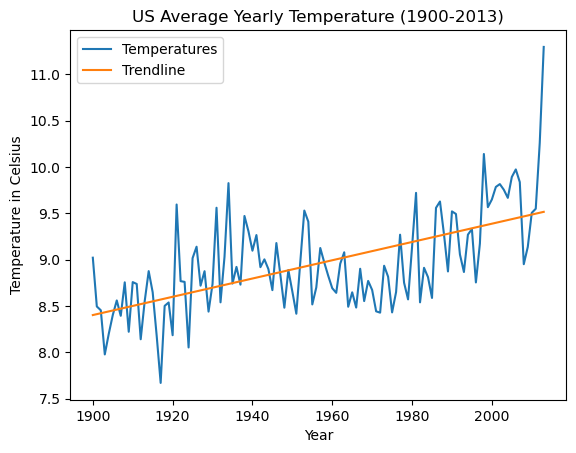

In [118]:
plt.plot(usa_temps)
plt.title("US Average Yearly Temperature (1900-2013)")
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")

z = np.polyfit(list(usa_temps.keys()), list(usa_temps.values), 1)
p = np.poly1d(z)

plt.plot(usa_temps.keys(), p(usa_temps.keys()))

plt.legend(["Temperatures", "Trendline"]);

In [119]:
emissions = emissions[emissions["Country"] == "USA"]
emissions = emissions[emissions["Year"] > 1900]


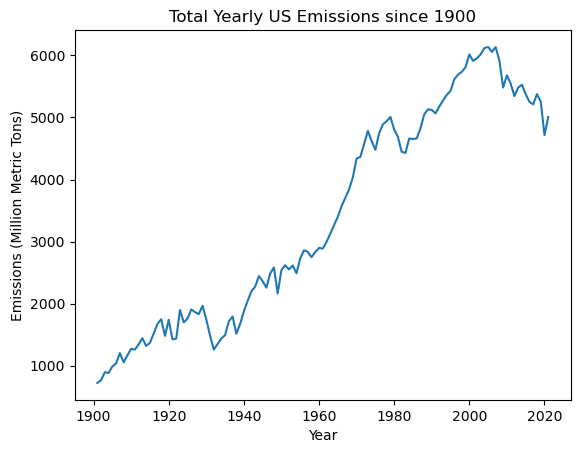

In [120]:
plt.plot(emissions["Year"], emissions["Total"])
plt.title("Total Yearly US Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

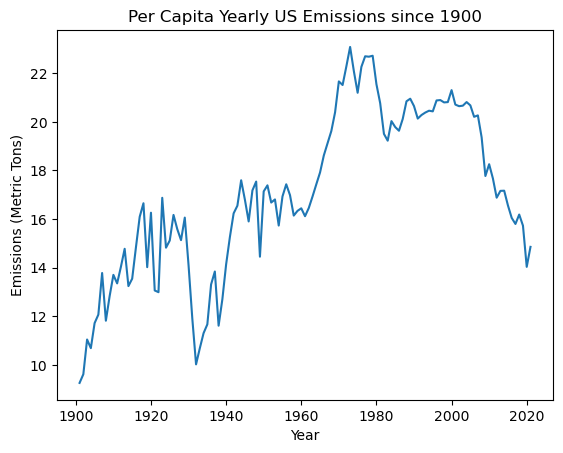

In [121]:
plt.plot(emissions["Year"], emissions["Per Capita"])
plt.title("Per Capita Yearly US Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Metric Tons)");

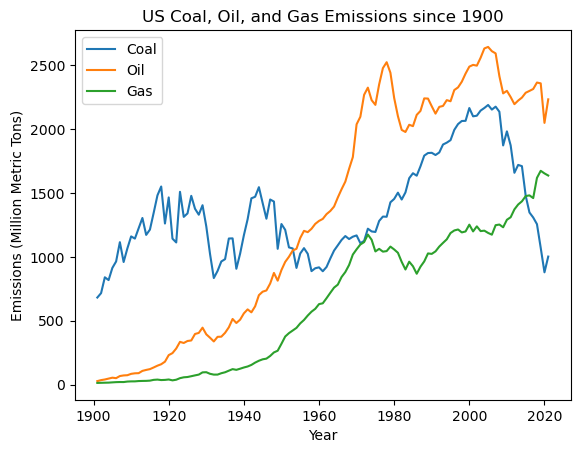

In [122]:

plt.plot(emissions["Year"], emissions["Coal"])
plt.plot(emissions["Year"], emissions["Oil"])
plt.plot(emissions["Year"], emissions["Gas"])

plt.legend(["Coal", "Oil", "Gas"])

plt.title("US Coal, Oil, and Gas Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

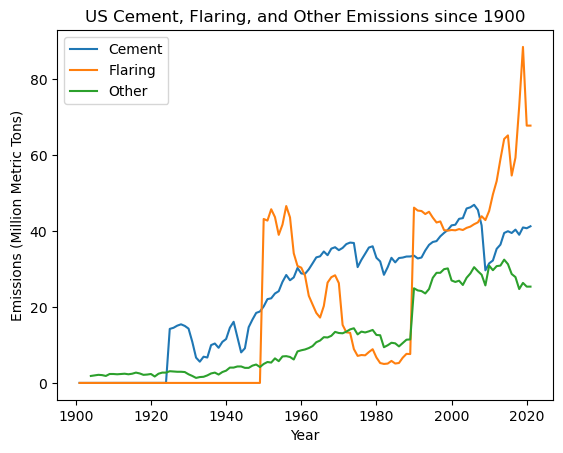

In [123]:
plt.plot(emissions["Year"], emissions["Cement"])
plt.plot(emissions["Year"], emissions["Flaring"])
plt.plot(emissions["Year"], emissions["Other"])
plt.legend(["Cement", "Flaring", "Other"])

plt.title("US Cement, Flaring, and Other Emissions since 1900")
plt.xlabel("Year")
plt.ylabel("Emissions (Million Metric Tons)");

In [135]:
tester = pd.read_csv("StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz")


In [136]:
tester.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0,NaN,NaN,NaN,F3,3.4,400,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0,NaN,NaN,NaN,F1,11.5,200,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0,NaN,NaN,NaN,F2,12.9,33,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0,NaN,NaN,NaN,F2,0.0,13,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0,NaN,NaN,NaN,F0,0.0,33,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [138]:
tester.EVENT_TYPE.value_counts()

Tornado    223
Name: EVENT_TYPE, dtype: int64

In [139]:
tester.STATE.value_counts()

KANSAS            33
LOUISIANA         28
OKLAHOMA          25
TEXAS             20
MISSISSIPPI       16
ARKANSAS          13
ILLINOIS          11
NORTH CAROLINA     9
NEBRASKA           6
MISSOURI           6
WISCONSIN          6
PENNSYLVANIA       6
FLORIDA            6
GEORGIA            4
IOWA               4
WYOMING            3
COLORADO           3
INDIANA            3
TENNESSEE          3
OHIO               3
NORTH DAKOTA       2
KENTUCKY           2
ALABAMA            2
CONNECTICUT        2
NEW MEXICO         2
MINNESOTA          1
MARYLAND           1
SOUTH CAROLINA     1
WEST VIRGINIA      1
SOUTH DAKOTA       1
Name: STATE, dtype: int64

In [140]:
test_2021 = pd.read_csv("StormEvents_details-ftp_v1.0_d2021_c20221216.csv.gz")
test_2022 = pd.read_csv("StormEvents_details-ftp_v1.0_d2022_c20221216.csv.gz")

In [146]:
test_2021.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202102,15,2357,202102,15,2358,156532,950756,NORTH CAROLINA,37,2021,February,Thunderstorm Wind,C,19,BRUNSWICK,ILM,15-FEB-21 23:57:00,EST-5,15-FEB-21 23:58:00,0,0,0,0,0.00K,0.00K,NWS Storm Survey,96.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,S,CAMP BRANCH,4.0,S,CAMP BRANCH,34.127,-78.3541,34.1278,-78.3508,Strong low pressure and a cold front produced ...,A few hundred trees were snapped or uprooted b...,CSV
1,202106,3,1842,202106,3,1845,161414,974816,IDAHO,16,2021,June,Thunderstorm Wind,C,45,GEM,BOI,03-JUN-21 18:42:00,MST-7,03-JUN-21 18:45:00,0,0,0,0,0.00K,0.00K,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SE,LETHA,2.0,ESE,LETHA,43.890,-116.6400,43.8895,-116.6058,Sufficient daytime heating lead to isolated af...,Branches knocked down with photo. Personal Wea...,CSV
2,202106,22,1850,202106,22,1855,161423,974825,OREGON,41,2021,June,Thunderstorm Wind,C,45,MALHEUR,BOI,22-JUN-21 18:50:00,MST-7,22-JUN-21 18:55:00,0,0,0,0,0.00K,0.00K,ASOS,54.0,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NE,LUSE,0.0,NW,ONTARIO,44.020,-117.0200,44.0310,-116.9711,Hot and dry conditions were ideal for thunders...,The ASOS at Ontario reported a 62 MPH thunders...,CSV
3,202102,7,1600,202102,7,1600,157970,954745,PUERTO RICO,99,2021,February,Rip Current,Z,1,SAN JUAN AND VICINITY,SJU,07-FEB-21 16:00:00,AST-4,07-FEB-21 16:00:00,0,0,1,0,0.00K,0.00K,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tourist couple was swept by rip currents at ...,A tourist couple was swept by rip currents at ...,CSV
4,202102,28,900,202102,28,900,157971,954749,VIRGIN ISLANDS,96,2021,February,Rip Current,Z,2,ST. CROIX,SJU,28-FEB-21 09:00:00,AST-4,28-FEB-21 09:00:00,0,0,1,0,0.00K,0.00K,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tourist staying at the Carambola Beach Resor...,A tourist staying at the Carambola Beach Resor...,CSV


In [147]:
test_2022.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,2022,February,High Wind,Z,33,SOUTHEASTERN ELKO,LKN,20-FEB-22 21:18:00,PST-8,20-FEB-22 22:18:00,0,0,0,0,0.00K,0.00K,Mesonet,36.0,MS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,2022,February,Heavy Snow,Z,37,S LANDER & S EUREKA,LKN,21-FEB-22 08:00:00,PST-8,22-FEB-22 10:00:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,2022,February,Heavy Snow,Z,31,N ELKO CNTY,LKN,22-FEB-22 02:00:00,PST-8,22-FEB-22 09:00:00,0,0,0,0,0.00K,0.00K,SNOTEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,2022,February,Waterspout,Z,452,FERNANDINA BEACH TO ST AUGUSTINE FL OUT 20NM,JAX,18-FEB-22 16:09:00,EST-5,18-FEB-22 16:09:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,SE,PONTE VEDRA,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,2022,February,Heavy Rain,C,2,TUTUILA,ASO,02-FEB-22 00:00:00,SST-11,03-FEB-22 00:00:00,0,0,0,0,50.00K,0.00K,Official NWS Observations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NNW,VAITOGI,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [143]:
test_2021.EVENT_TYPE.value_counts()

Thunderstorm Wind             15535
Hail                           6267
Flash Flood                    4800
High Wind                      4597
Drought                        4083
Winter Weather                 3914
Winter Storm                   2945
Marine Thunderstorm Wind       2684
Heavy Snow                     2237
Flood                          2037
Tornado                        1543
Heavy Rain                     1368
Heat                           1253
Extreme Cold/Wind Chill         978
Strong Wind                     864
Cold/Wind Chill                 728
Excessive Heat                  666
Dense Fog                       617
Frost/Freeze                    581
Ice Storm                       378
High Surf                       355
Wildfire                        352
Tropical Storm                  276
Blizzard                        253
Lightning                       242
Coastal Flood                   214
Debris Flow                     212
Funnel Cloud                

In [144]:
test_2022.EVENT_TYPE.value_counts()

Thunderstorm Wind             16963
Hail                           6839
Drought                        4949
High Wind                      3639
Winter Weather                 3290
Flash Flood                    2859
Winter Storm                   2547
Marine Thunderstorm Wind       2360
Heat                           1800
Flood                          1604
Heavy Snow                     1455
Excessive Heat                 1231
Tornado                        1159
Heavy Rain                      883
Extreme Cold/Wind Chill         782
Strong Wind                     649
Cold/Wind Chill                 495
Blizzard                        395
Wildfire                        380
High Surf                       301
Lightning                       249
Frost/Freeze                    200
Waterspout                      195
Funnel Cloud                    185
Dust Storm                      173
Ice Storm                       170
Dense Fog                       169
Tropical Storm              